In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('../src'))
from ml.deeponet_trainer import DeepONetTrainer, LocalLoader
from ml.fno_2d import FNOTrainer
import torch

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [123]:
# Example usage
file_path = "../src/simulations_2/helmholtz_equation.h5"

# Create data loader
loader = LocalLoader(file_path)

# Define trainer with model configuration
trainer = DeepONetTrainer(
    branch_hidden_layers=[128, 128, 128],
    trunk_hidden_layers=[128, 128, 128],
    data_loader=loader,
)

# Train model and save metrics
trainer.train(
    epochs=20000,
    batch_size=6,
    learning_rate=1e-2,
    metrics_file="deeponet_metrics.csv",
)

branch_train shape: (16, 1)
branch_test shape: (4, 1)
output_train shape: (16, 2601)
output_test shape: (4, 2601)
output_train shape after flattening: (16, 2601)
output_test shape after flattening: (4, 2601)
trunk_train shape: (2601, 3)
trunk_test shape: (2601, 3)
Compiling model...
'compile' took 0.000981 s

Training model...

Step      Train loss    Test loss     Test metric             
0         [1.88e+00]    [3.41e+00]    [3.41e+00, 1.83e+00]    
1000      [9.84e-01]    [1.01e+00]    [1.01e+00, 9.97e-01]    
2000      [8.19e-01]    [8.29e-01]    [8.29e-01, 9.02e-01]    
3000      [7.12e-01]    [7.88e-01]    [7.88e-01, 8.79e-01]    
4000      [8.31e-01]    [7.33e-01]    [7.33e-01, 8.48e-01]    
5000      [7.09e-01]    [7.28e-01]    [7.28e-01, 8.45e-01]    
6000      [5.23e-01]    [7.17e-01]    [7.17e-01, 8.39e-01]    
7000      [5.97e-01]    [6.91e-01]    [6.91e-01, 8.23e-01]    
8000      [4.85e-01]    [6.76e-01]    [6.76e-01, 8.14e-01]    
9000      [5.98e-01]    [6.79e-01]    [6

In [138]:
N = 50
mesh = create_unit_square(
    MPI.COMM_WORLD, N, N
)
V = fem.functionspace(mesh, ("Lagrange", 1))
n = 1
kappa = 2*n*np.pi

def f_expression(x):
    return kappa**2 * np.sin(n*np.pi * x[0]) * np.sin(n*np.pi * x[1])

f_interpolated = fem.Function(V)
f_interpolated.interpolate(f_expression)

In [139]:
sol_dpnxd = trainer.model.predict((f_interpolated.x.array.reshape((2601,1)), mesh.geometry.x))

In [140]:
sol_dpnxd.shape

(2601, 2601)

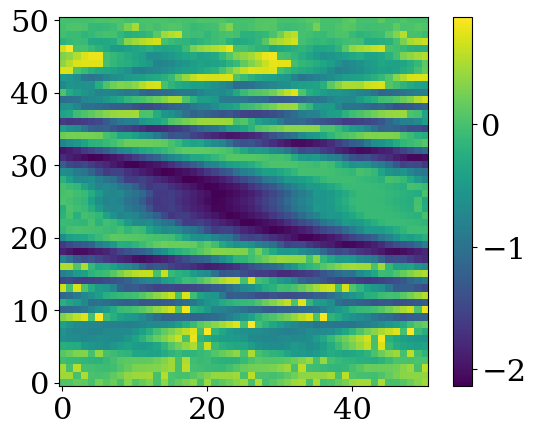

In [141]:
plt.imshow((sol_dpnxd[0].reshape((51, 51))), cmap='viridis', origin='lower')
plt.colorbar()

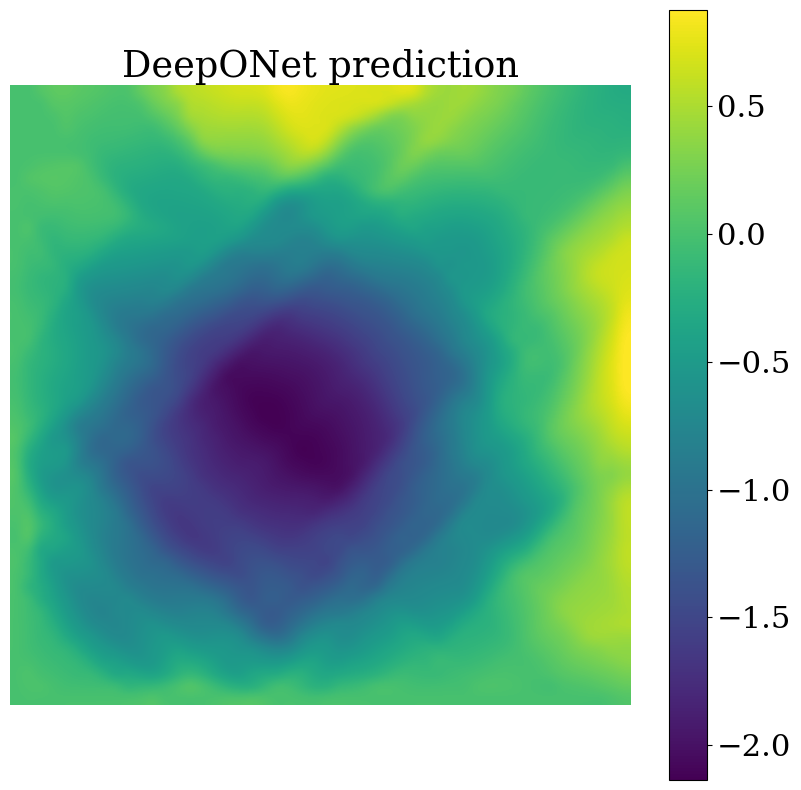

In [144]:
Nx, Ny = 50, 50
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
fake_ah_sol = sol_dpnxd[0].reshape((51, 51))
uh_semenly = fake_ah_sol.ravel()
uh = fem.Function(V)
uh.x.array[:] = uh_semenly
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.title("DeepONet prediction")
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()

In [7]:
trainer.train_loader.dataset[0][1].shape

torch.Size([1681])

In [59]:
path = "../src/simulations_2/helmholtz_equation.h5"

trainer = FNOTrainer(file_path=path, batch_size=1, lr=1e-2, epochs=30)
trainer.run()

Epoch 1, Train Loss: 1.237190, Test Loss: 0.584070, L2 Error: 0.736974, Time Elapsed: 0.85 seconds
Epoch 2, Train Loss: 0.489865, Test Loss: 1.636561, L2 Error: 1.149294, Time Elapsed: 1.69 seconds
Epoch 3, Train Loss: 0.462200, Test Loss: 0.187876, L2 Error: 0.398749, Time Elapsed: 2.52 seconds
Epoch 4, Train Loss: 0.266564, Test Loss: 0.133050, L2 Error: 0.356237, Time Elapsed: 3.37 seconds
Epoch 5, Train Loss: 0.167516, Test Loss: 0.087154, L2 Error: 0.289868, Time Elapsed: 4.21 seconds
Epoch 6, Train Loss: 0.202790, Test Loss: 0.100456, L2 Error: 0.310934, Time Elapsed: 5.05 seconds
Epoch 7, Train Loss: 0.241917, Test Loss: 0.107546, L2 Error: 0.318568, Time Elapsed: 5.90 seconds
Epoch 8, Train Loss: 0.128655, Test Loss: 0.102381, L2 Error: 0.314915, Time Elapsed: 6.73 seconds
Epoch 9, Train Loss: 0.113712, Test Loss: 0.064238, L2 Error: 0.250295, Time Elapsed: 7.56 seconds
Epoch 10, Train Loss: 0.081763, Test Loss: 0.036812, L2 Error: 0.189291, Time Elapsed: 8.40 seconds
Epoch 11,

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from dolfinx.mesh import create_unit_square
import dolfinx.fem as fem
from dolfinx import geometry
from mpi4py import MPI

N = 50
mesh = create_unit_square(
    MPI.COMM_WORLD, N, N
)
V = fem.functionspace(mesh, ("Lagrange", 1))
n = 2
kappa = 2*n*np.pi

def f_expression(x):
    return kappa**2 * np.sin(n*np.pi * x[0]) * np.sin(n*np.pi * x[1])

f_interpolated = fem.Function(V)
f_interpolated.interpolate(f_expression)

In [45]:
N = int(np.sqrt(f_interpolated.x.array.shape[0]))
fmean  = trainer.stats['field_mean']
fstd = trainer.stats['field_std']
sol_mean = trainer.stats['solutions_mean']
sol_std = trainer.stats['solutions_std']
cringe_tensor_normie = (f_interpolated.x.array.reshape((1, -1, N, N)) - fmean)/fstd
cringe_tensor = torch.tensor(cringe_tensor_normie, dtype=torch.float32)


In [46]:
from time import time
start = time()
sol_cringe = trainer.model(cringe_tensor)
print(time() - start)

# trainer.model.eval()
# with torch.no_grad():
#     for x, y in trainer.test_loader:
#         sol_cringe = trainer.model(x)
#         break 


7.93892502784729


In [63]:
N = [2**i for i in range(2, 12)]
times = []
for n in N:
    mesh = create_unit_square(MPI.COMM_WORLD, n, n)
    V = fem.functionspace(mesh, ("Lagrange", 1))
    f_interpolated = fem.Function(V)
    f_interpolated.interpolate(f_expression)

    n_new = int(np.sqrt(f_interpolated.x.array.shape[0]))
    
    cringe_tensor_normie = (f_interpolated.x.array.reshape((1, -1, n_new, n_new)) - fmean)/fstd
    cringe_tensor = torch.tensor(cringe_tensor_normie, dtype=torch.float32)

    start = time()
    sol_cringe = trainer.model(cringe_tensor)
    times.append(time() - start)

np.save("fno_times.npy", np.array(times))

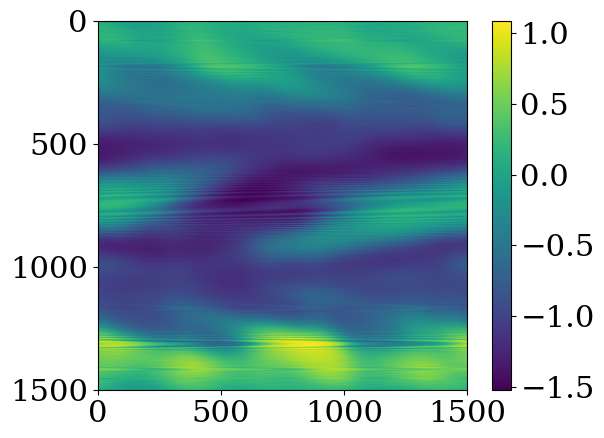

In [47]:
sol_edgy = sol_cringe.detach().numpy()[0, 0, :, :]* sol_std + sol_mean
plt.imshow(sol_edgy, cmap='viridis')
plt.colorbar()

In [22]:
uh = sol_edgy.ravel()

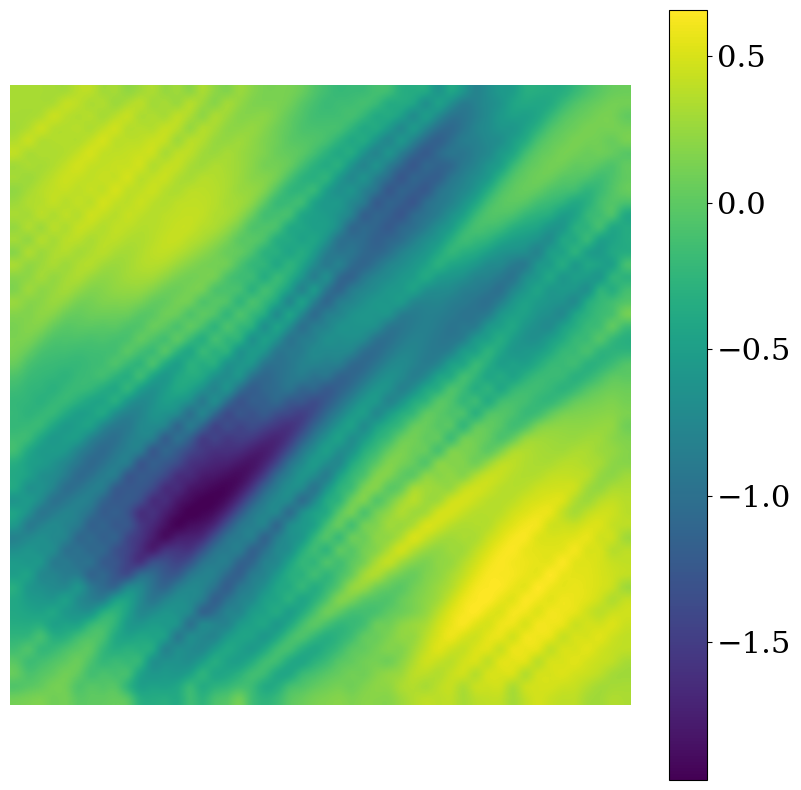

In [29]:
from dolfinx import geometry
# Grid points
Nx, Ny = 50, 50
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
uh_semenly = sol_edgy.ravel()
uh = fem.Function(V)
uh.x.array[:] = uh_semenly
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()

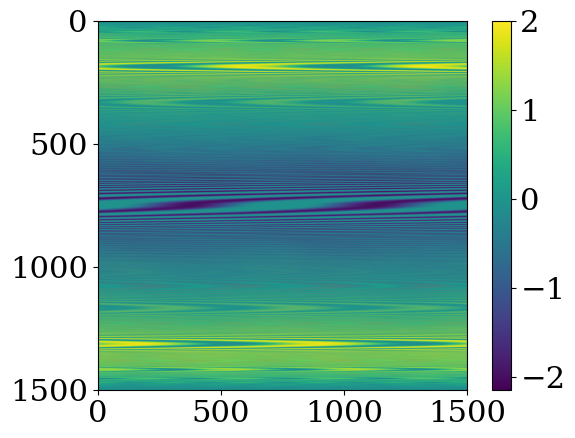

In [48]:
cringe_tensor_normie = f_interpolated.x.array.reshape((1, -1, N, N))
cringe_tensor = torch.tensor(cringe_tensor_normie, dtype=torch.float32)
sol_cringe = trainer.model(cringe_tensor)
plt.imshow(sol_cringe.detach().numpy()[0, 0, :, :]/np.max(sol_cringe.detach().numpy()[0, 0, :, :])*2, cmap='viridis')
plt.colorbar()

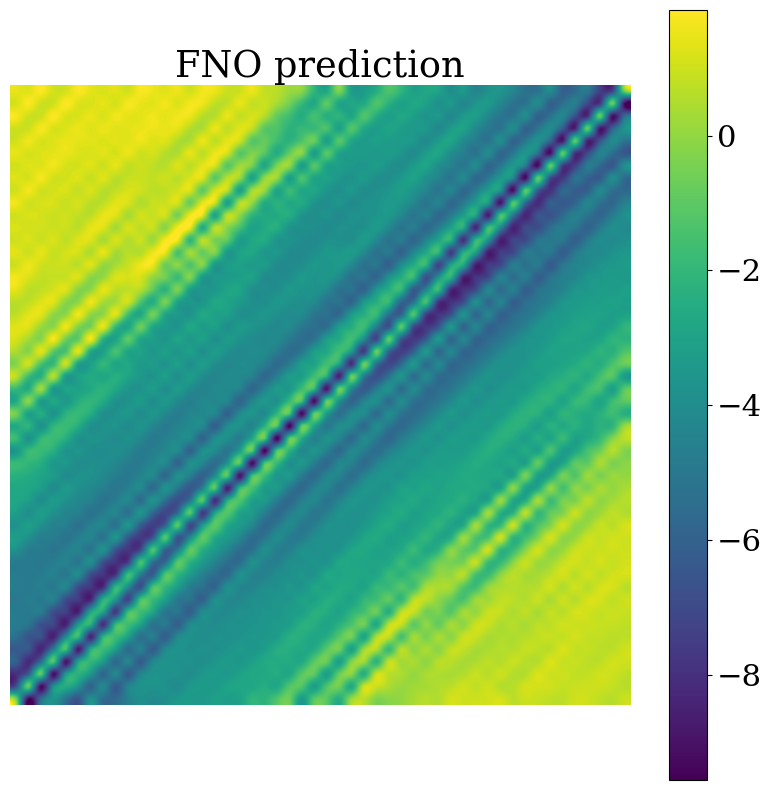

In [64]:
Nx, Ny = 50, 50
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
fake_ah_sol = sol_cringe.detach().numpy()[0, 0, :, :]/np.max(sol_cringe.detach().numpy()[0, 0, :, :])*2
uh_semenly = fake_ah_sol.ravel()
uh = fem.Function(V)
uh.x.array[:] = uh_semenly
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.title("FNO prediction")
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()

In [7]:
cosa1, cosa2 = trainer.load_data()

In [30]:
for x,y in trainer.test_loader:
    print('semen', x.shape)
    print(trainer.model(x)[0, 0])


semen torch.Size([10, 1, 41, 41])
tensor([[ 1.0003e-01,  1.1541e-01, -7.7807e-01,  ...,  3.1269e-01,
         -9.1310e-01, -9.9998e-01],
        [ 4.0953e-01,  1.3720e+00,  6.3397e-02,  ...,  1.0428e+00,
          1.6184e+00,  1.7367e+00],
        [ 1.1068e+00,  3.0866e-02, -1.5229e-01,  ..., -1.2550e+00,
         -1.5839e+00, -1.4668e+00],
        ...,
        [-1.2270e+00, -1.4187e+00, -1.1272e+00,  ..., -7.5437e-04,
          7.5116e-02,  1.2007e+00],
        [ 1.6317e+00,  1.5303e+00,  8.7166e-01,  ...,  1.2861e+00,
          1.4905e+00,  5.5461e-01],
        [-1.0170e+00, -9.6937e-01,  3.5042e-01,  ...,  5.6705e-02,
         -7.9540e-01,  7.0734e-02]], grad_fn=<SelectBackward0>)


In [34]:
trainer.train_loader.dataset[0][0].shape

torch.Size([1, 41, 41])

In [6]:
trainer.model.eval()

FNO2d(
  (positional_embedding): GridEmbeddingND()
  (fno_blocks): FNOBlocks(
    (convs): ModuleList(
      (0-3): 4 x SpectralConv(
        (weight): DenseTensor(shape=torch.Size([64, 64, 16, 9]), rank=None)
      )
    )
    (fno_skips): ModuleList(
      (0-3): 4 x Flattened1dConv(
        (conv): Conv1d(64, 64, kernel_size=(1,), stride=(1,), bias=False)
      )
    )
    (channel_mlp): ModuleList(
      (0-3): 4 x ChannelMLP(
        (fcs): ModuleList(
          (0): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
          (1): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
        )
      )
    )
    (channel_mlp_skips): ModuleList(
      (0-3): 4 x SoftGating()
    )
  )
  (lifting): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(3, 128, kernel_size=(1,), stride=(1,))
      (1): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
    )
  )
  (projection): ChannelMLP(
    (fcs): ModuleList(
      (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
      (1): Conv1d(128, 1, kernel_